In [11]:
## Once yfinance is installed, you can use the following code to download historical data for your 7 assets.

# Load libraries
from IPython.display import display
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statistics

# Create a list of assets (update this with your chosen assets):
stock_tickers = ['C', 'DB', 'GE', 'GM', 'MS', 'NVDA', 'RYCEY']
fund_tickers = ['DIA', 'IWM', 'SPY']
full_tickers = ['C', 'DB', 'GE', 'GM', 'MS', 'NVDA', 'RYCEY', 'DIA',  'SPY', 'IWM']

# Assign a start date and end date for the data download, 1 year of data
start_date = dt.datetime.today() - pd.Timedelta(3650, "d")
end_date = dt.datetime.today()

# Download the data using the above variables
stock_port = yf.download(start=start_date, end=end_date, tickers = stock_tickers)['Adj Close'].sort_values(by='Date',ascending=False)
fund_port = yf.download(start=start_date, end=end_date, tickers = fund_tickers)['Adj Close'].sort_values(by='Date',ascending=False)
full_port = yf.download(start=start_date, end=end_date, tickers = full_tickers)['Adj Close'].sort_values(by='Date',ascending=False)


[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  10 of 10 completed


In [12]:
###PART ONE###


# Portfolio Weight (equally weighted)
portfolio_weight=1/len(stock_tickers)

# Annualized Volatility (using trailing 3-months)
three_month_adj_close = stock_port.head(63)
standard_deviation=three_month_adj_close.std()/three_month_adj_close.mean()*np.sqrt(253)

annualized_volatility=standard_deviation.tolist()


# Beta against SPY (using trailing 12-months)
covariance=(full_port.head(253).pct_change().cov().drop(['SPY', 'DIA', 'IWM'])[['DIA', 'IWM', 'SPY']])
variance=(full_port.head(253).pct_change().var()[['DIA', 'IWM', 'SPY']])

variance_dia=(variance['DIA'])
variance_iwm=(variance['IWM'])
variance_spy=(variance['SPY'])

covariance=covariance.div([variance_dia, variance_iwm, variance_spy])

beta_dia=covariance['DIA']
beta_iwm=covariance['IWM']
beta_spy=covariance['SPY']

# Average and Max Weekly Drawdown
stock_port = stock_port.sort_values(by='Date',ascending=True)
week_dd = list() # weekly drawdown
week_avg = list() # average of drawdowns
week_max = list() # max drawdowns
start_date = dt.date.today()
for y in range(len(stock_tickers)): # Loop over tickers
    for z in range(1,52): # Loop over 52 weeks
        week_dd.append((stock_port[stock_tickers[y]].loc[start_date-dt.timedelta(days=6):start_date].min()-stock_port[stock_tickers[y]].loc[start_date-dt.timedelta(days=6):start_date].max())/stock_port[stock_tickers[y]].loc[start_date-dt.timedelta(days=6):start_date].max()) # Appending weekly drawdown to a list 
        start_date = start_date - dt.timedelta(days=6) # Going to the next 7 day interval
    week_avg.append(statistics.mean(week_dd)) # Taking averages and adding to a list. Individual values correspond to average weekly drawdown of each stock.
    week_max.append(min(week_dd))
    week_dd = list() # Initializing
    start_date = dt.date.today() # Initializing to repeat the same procedure with another stock
stock_port = stock_port.sort_values(by='Date',ascending=False)



# Total Return (using trailing 10-years)
total_retun_1 = (((stock_port.head(1)-(stock_port.iloc[-1]))/(stock_port.iloc[-1]))*100)
total_retun_1 = total_retun_1.squeeze()

#Annualized Total Return (using trailing 10-years)
annualized_retun_10 =(pow((total_retun_1/100+1),(1/10))-1)*100

# Creating Table
data = {"Portfolio Weight": portfolio_weight, "Annualized Voltility": annualized_volatility, "Beta (DIA)": beta_dia, "Beta (IWM)": beta_iwm, "Beta (SPY)": beta_spy, "Weekly Drawdown (52 Week avg)": week_avg, "Weekly Drawdown (52 Week max)": week_max, "Total Return (%)": total_retun_1, "Total Return (Annualized in %)": annualized_retun_10}
table = pd.DataFrame(data)
display(table)

,Portfolio Weight,Annualized Voltility,Beta (DIA),Beta (IWM),Beta (SPY),Weekly Drawdown (52 Week avg),Weekly Drawdown (52 Week max),Total Return (%),Total Return (Annualized in %)
Ticker,,,,,,,,,
C,0.142857,0.626539,1.493366,0.733428,1.071461,-0.030893,-0.125295,58.411955,4.707742
DB,0.142857,1.027297,1.045158,0.558659,0.866643,-0.038671,-0.096792,-36.318107,-4.412391
GE,0.142857,0.951701,1.115557,0.571079,1.218565,-0.038223,-0.128099,74.286586,5.712513
GM,0.142857,0.937716,1.443230,0.748115,0.950131,-0.037657,-0.109564,127.032950,8.544767
MS,0.142857,1.053929,1.430670,0.714795,0.983583,-0.029215,-0.107935,354.465323,16.345630
NVDA,0.142857,1.483799,1.235024,0.645945,2.719036,-0.066152,-0.146918,31478.818359,77.803206
RYCEY,0.142857,1.217922,1.295397,0.608302,1.324997,-0.040642,-0.088398,-34.803267,-4.187409


In [13]:
### PART TWO ###


# Correltion against ETF

portfolio_sum = (stock_port.pct_change()).sum(axis = 'columns')/len(stock_tickers)
etf_pct = (fund_port.pct_change())
correlation = [portfolio_sum.corr(etf_pct['DIA']), portfolio_sum.corr(etf_pct['IWM']), portfolio_sum.corr(etf_pct['SPY'])]                          

# Covariance against ETF (x10^3 to gain more insight)
covariance = [portfolio_sum.cov(etf_pct["DIA"])*1000, portfolio_sum.cov(etf_pct["IWM"])*1000,portfolio_sum.cov(etf_pct["SPY"])*1000]

# Tracking Errors
a = {"Portfolio": portfolio_sum, 'DIA': etf_pct['DIA'],'IWM': etf_pct['IWM'],'SPY': etf_pct['SPY']}
a = pd.DataFrame(a).iloc[1:, :]

dia_tracking_errr = (a['Portfolio']-a['DIA']).std()*100
iwm_tracking_errr = (a['Portfolio']-a['IWM']).std()*100
spy_tracking_errr = (a['Portfolio']-a['SPY']).std()*100

tracking_error = [dia_tracking_errr, iwm_tracking_errr, spy_tracking_errr]

# Sharpe Ratio

R_f = ((yf.download("^IRX")["Adj Close"].iloc[-1:])+1)**(1/252)-1# gettin risk-free
R_p=portfolio_sum.mean()
Sr=pd.DataFrame([(R_f-R_p)/((portfolio_sum-etf_pct['DIA']).std()),(R_f-R_p)/((portfolio_sum-etf_pct['IWM']).std()),(R_f-R_p)/((portfolio_sum-etf_pct['SPY']).std())]).iloc[:,0]

# Anualized Volatility
P_v = portfolio_sum.head(252).std()* np.sqrt(252)
DIA_v = etf_pct['DIA'].head(252).std()* np.sqrt(252)
IWM_v = etf_pct['IWM'].head(252).std()* np.sqrt(252)
SPY_v = etf_pct['SPY'].head(252).std()* np.sqrt(252)
a_v = [P_v-DIA_v, P_v-IWM_v, P_v-SPY_v]

# Creating Table
table = {"Ticker": fund_tickers, "ETF Correlation": correlation, "ETF Covariance (x10^3)": covariance, "Tracking Error (%)": tracking_error, "Sharpe Ratio": Sr}
table = pd.DataFrame(table)
display(table)



[*********************100%%**********************]  1 of 1 completed


,Ticker,ETF Correlation,ETF Covariance (x10^3),Tracking Error (%),Sharpe Ratio
Adj Close,DIA,0.825760,0.162307,1.061032,0.654343
Adj Close,IWM,0.821862,0.207932,1.010337,0.687176
Adj Close,SPY,0.823214,0.163054,1.062957,0.653158


In [10]:
# Correlation Matrix
ps = pd.DataFrame({"Portfolio": portfolio_sum})
table = pd.merge(full_port.pct_change(),ps, on="Date").iloc[2:]
CM = table.corr()
display(CM)


,C,DB,DIA,GE,GM,IWM,MS,NVDA,RYCEY,SPY,Portfolio
C,1.000000,0.627323,0.771853,0.565201,0.616965,0.744529,0.819231,0.359865,0.362863,0.724750,0.826535
DB,0.627323,1.000000,0.561399,0.437510,0.466646,0.561931,0.628532,0.308507,0.332468,0.542037,0.740356
DIA,0.771853,0.561399,1.000000,0.597011,0.639667,0.849418,0.792304,0.532105,0.375998,0.955358,0.825776
GE,0.565201,0.437510,0.597011,1.000000,0.476578,0.578478,0.544105,0.318628,0.324756,0.572059,0.702314
GM,0.616965,0.466646,0.639667,0.476578,1.000000,0.664572,0.590990,0.358714,0.326389,0.618431,0.735925
IWM,0.744529,0.561931,0.849418,0.578478,0.664572,1.000000,0.749405,0.541990,0.389331,0.870745,0.821853
MS,0.819231,0.628532,0.792304,0.544105,0.590990,0.749405,1.000000,0.425140,0.330362,0.757497,0.823468
NVDA,0.359865,0.308507,0.532105,0.318628,0.358714,0.541990,0.425140,1.000000,0.187615,0.649105,0.607952
RYCEY,0.362863,0.332468,0.375998,0.324756,0.326389,0.389331,0.330362,0.187615,1.000000,0.356644,0.622415
SPY,0.724750,0.542037,0.955358,0.572059,0.618431,0.870745,0.757497,0.649105,0.356644,1.000000,0.823224


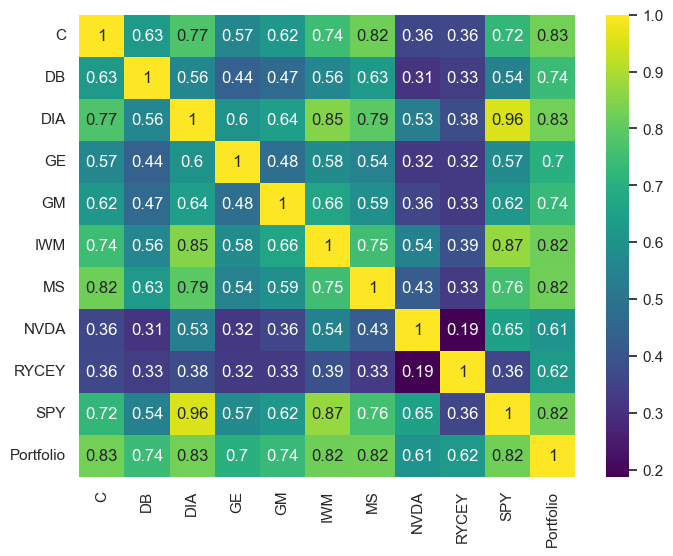

In [14]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, cmap='viridis')

# Show the plot
plt.show()